# Exploratory Data Analysis - Sports (Level - Advanced)

### Anantha Raman V #GRIPFEB21 @ The Spark Foundation

#### Data Science and Business Analytics Intern

#### 1. Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
#### 2. As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
#### 3. Suggest teams or players a company should endorse for its products.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### The datasets used in this analysis include the data of IPL from 2008 to 2019

In [4]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [5]:
matches.tail().T

,751,752,753,754,755
id,11347,11412,11413,11414,11415
season,2019,2019,2019,2019,2019
city,Mumbai,Chennai,Visakhapatnam,Visakhapatnam,Hyderabad
date,05/05/19,07/05/19,08/05/19,10/05/19,12/05/19
team1,Kolkata Knight Riders,Chennai Super Kings,Sunrisers Hyderabad,Delhi Capitals,Mumbai Indians
team2,Mumbai Indians,Mumbai Indians,Delhi Capitals,Chennai Super Kings,Chennai Super Kings
toss_winner,Mumbai Indians,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,Mumbai Indians
toss_decision,field,bat,field,field,bat
result,normal,normal,normal,normal,normal
dl_applied,0,0,0,0,0


In [6]:
deliveries.tail().T

,179073,179074,179075,179076,179077
match_id,11415,11415,11415,11415,11415
inning,2,2,2,2,2
batting_team,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings
bowling_team,Mumbai Indians,Mumbai Indians,Mumbai Indians,Mumbai Indians,Mumbai Indians
over,20,20,20,20,20
ball,2,3,4,5,6
batsman,RA Jadeja,SR Watson,SR Watson,SN Thakur,SN Thakur
non_striker,SR Watson,RA Jadeja,RA Jadeja,RA Jadeja,RA Jadeja
bowler,SL Malinga,SL Malinga,SL Malinga,SL Malinga,SL Malinga
is_super_over,0,0,0,0,0


In [7]:
deliveries.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [8]:
deliveries.shape

(179078, 21)

In [9]:
df_batsman_tmp  = deliveries.groupby(['batsman']).agg({'total_runs':[sum]}).reset_index()

In [10]:
deliveries['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

Delhi Daredevils was renamed as Delhi Capitals, hence replacing Delhi Daredevils with Delhi Capitals

Rising Pune Supergiant and Rising Pune Supergiants are the same team, its a typo in the dataset, hence replacing Rising Pune Supergiant with Rising Pune Supergiants

In [11]:
deliveries.replace(to_replace=['Delhi Daredevils','Rising Pune Supergiant'],
                   value=['Delhi Capitals','Rising Pune Supergiants'],inplace=True)

In [12]:
deliveries['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

#### Total Runs Scored by Each Team

In [13]:
runs_scored_df = deliveries.groupby(['batting_team']).agg({'total_runs':sum}).sort_values(by='total_runs',ascending=False)
runs_scored_df.columns = ['Total Runs Scored']
runs_scored_df

,Total Runs Scored
batting_team,
Mumbai Indians,29809
Royal Challengers Bangalore,28126
Kings XI Punjab,27893
Kolkata Knight Riders,27419
Delhi Capitals,27018
Chennai Super Kings,26418
Rajasthan Royals,22431
Sunrisers Hyderabad,17059
Deccan Chargers,11463


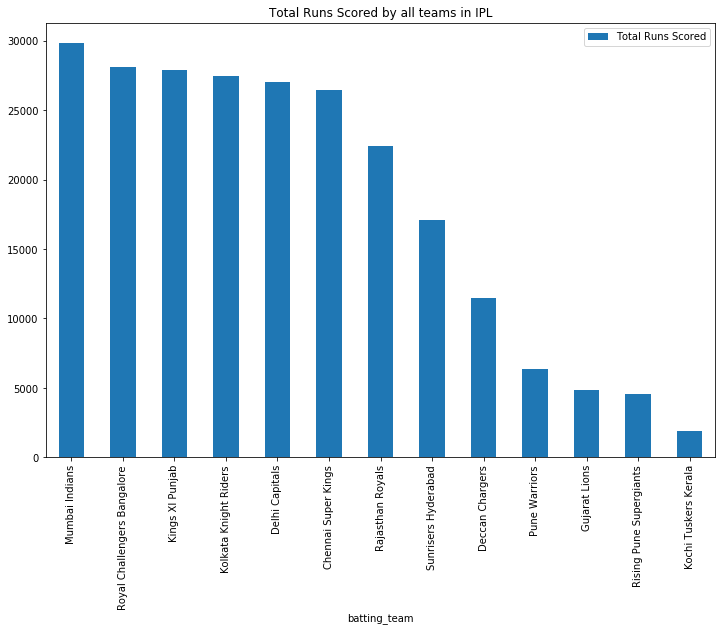

In [14]:
runs_scored_df.plot(kind='bar',figsize=(12,8))
plt.title('Total Runs Scored by all teams in IPL')
plt.show()

Till 2019, Mumbai Indians has scored the most runs. From 12 seasons Mumbai Indians has scored 29809 runs. RCB and KXIP follows with 28126 and 27893 runs respectively. Its not much of a surprise to see Chennai Super Kings at 6th position as they did not play 2 seasons.

#### Total Runs Conceded by Each Team

In [15]:
runs_given_df = deliveries.groupby(['bowling_team']).agg({'total_runs':sum}).sort_values(by='total_runs',ascending=False)
runs_given_df.columns = ['Total Runs Given']
runs_given_df

,Total Runs Given
bowling_team,
Mumbai Indians,28901
Royal Challengers Bangalore,28569
Kings XI Punjab,28326
Delhi Capitals,27485
Kolkata Knight Riders,27375
Chennai Super Kings,25194
Rajasthan Royals,22657
Sunrisers Hyderabad,16683
Deccan Chargers,11618


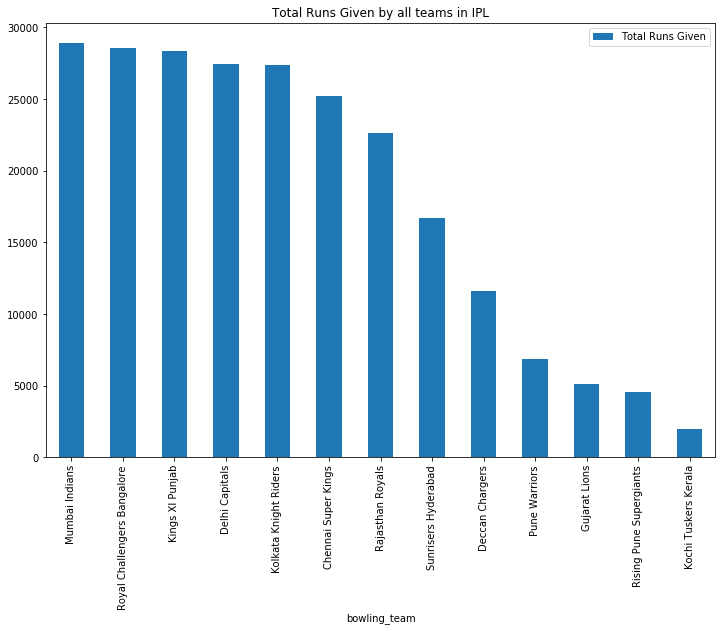

In [16]:
runs_given_df.plot(kind='bar',figsize=(12,8))
plt.title('Total Runs Given by all teams in IPL')
plt.show()

Till 2019, MI has given away the most runs. From 12 seasons MI gave away 28901 runs, followed by RCB and KXIP giving away 28569 and 28326 runs respectively.

In [17]:
run_diff_list = list()
for team in runs_scored_df.index:
    run_diff =  runs_scored_df.loc[team,'Total Runs Scored'] - runs_given_df.loc[team,'Total Runs Given']
    run_diff_list.append(run_diff)
    


In [18]:
run_diff_df = pd.DataFrame(run_diff_list,index = runs_scored_df.index,columns=['Run Difference'])
run_diff_df = run_diff_df.sort_values(by = 'Run Difference',ascending = False)
run_diff_df

,Run Difference
batting_team,
Chennai Super Kings,1224
Mumbai Indians,908
Sunrisers Hyderabad,376
Kolkata Knight Riders,44
Rising Pune Supergiants,-16
Kochi Tuskers Kerala,-85
Deccan Chargers,-155
Rajasthan Royals,-226
Gujarat Lions,-228


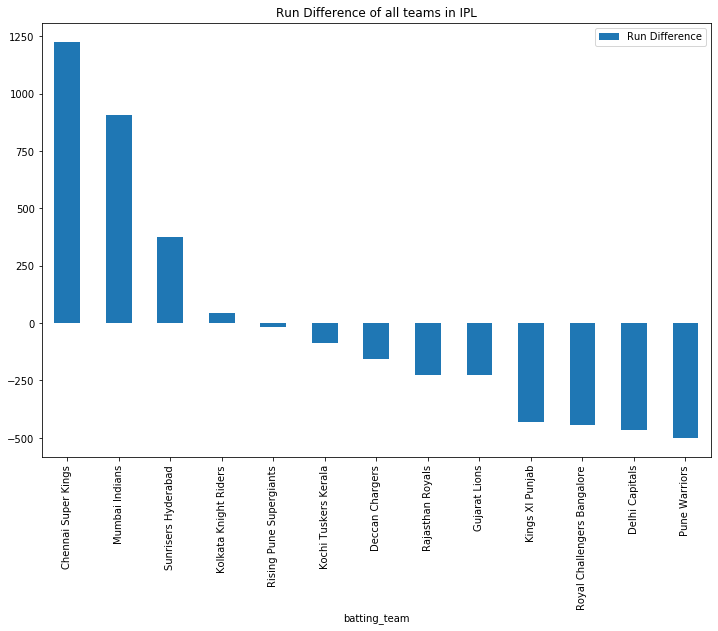

In [19]:
run_diff_df.plot(kind='bar',figsize=(12,8))
plt.title('Run Difference of all teams in IPL')
plt.show()

#### Runs Scored by a team against other teams

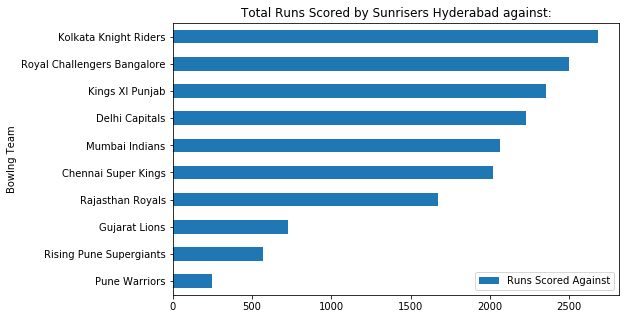

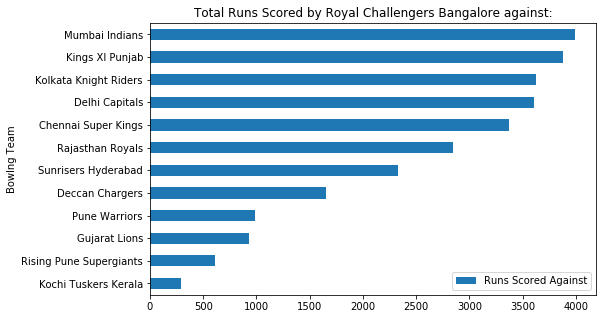

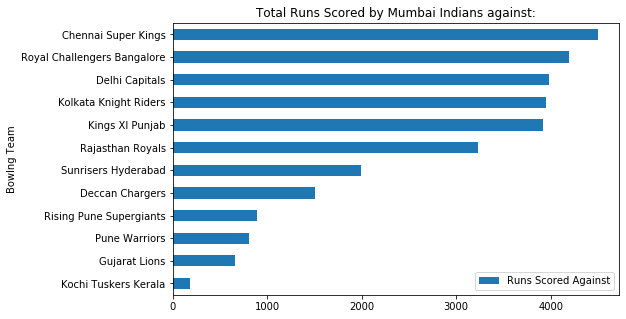

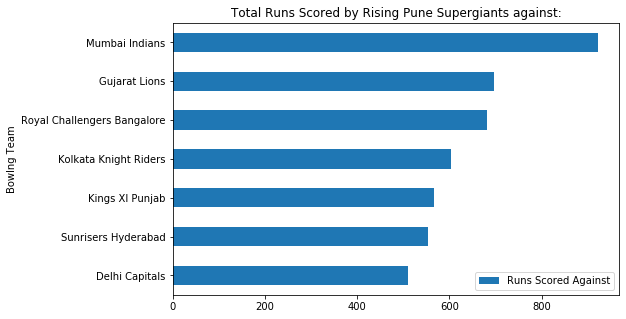

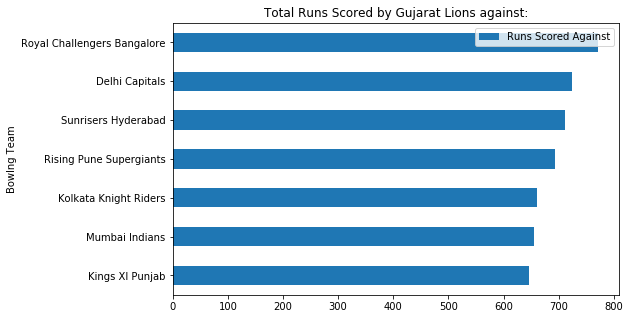

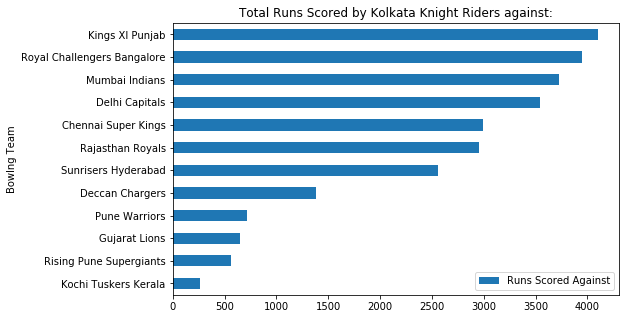

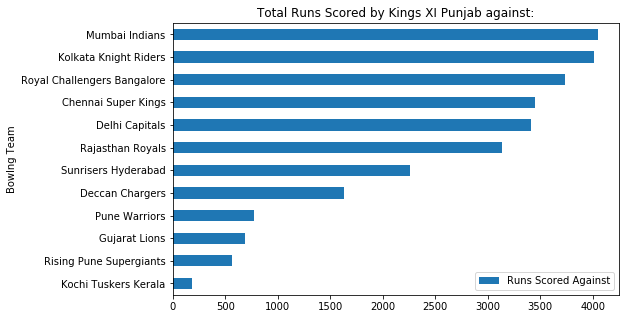

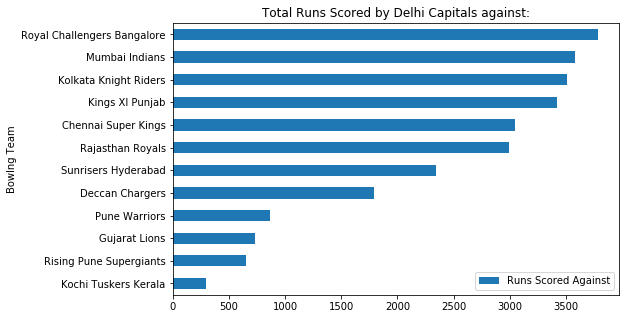

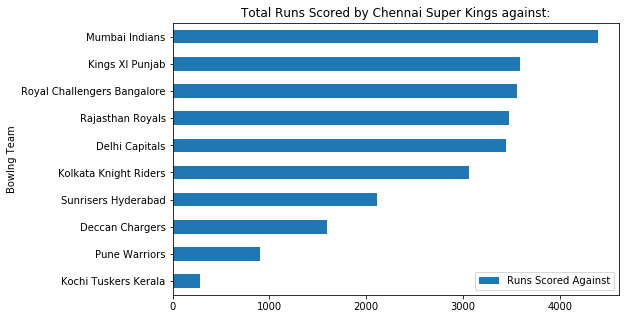

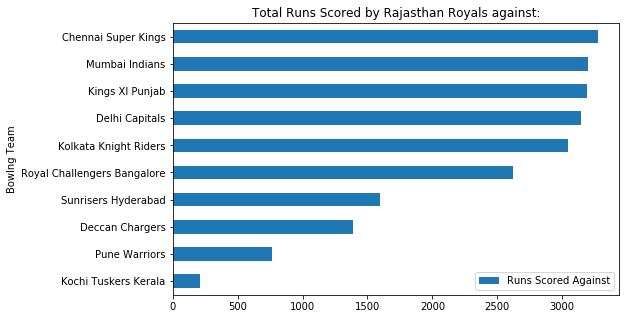

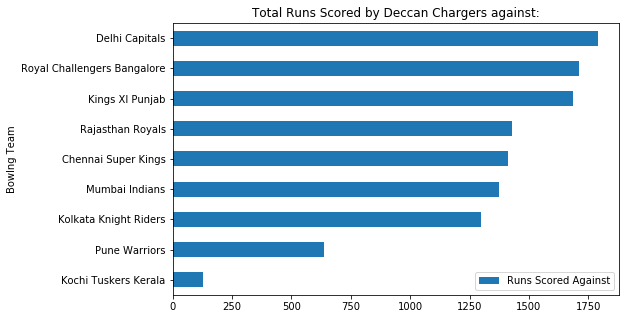

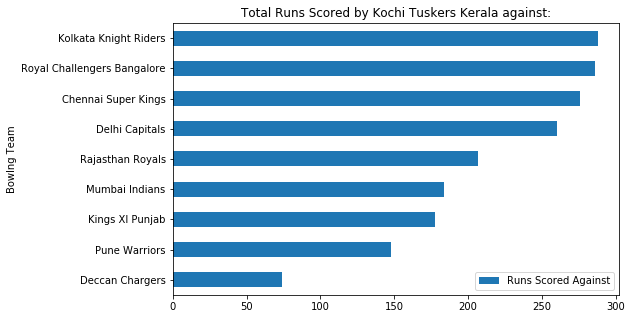

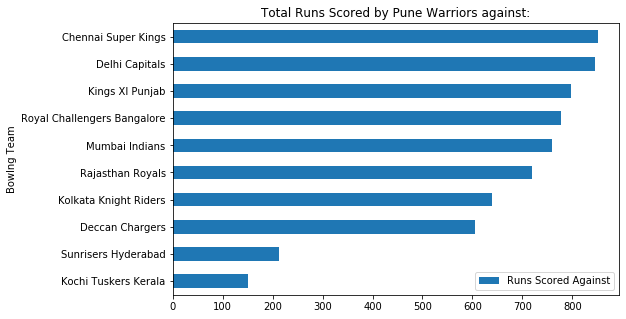

In [20]:
for team in deliveries['batting_team'].unique():
    temp_df = deliveries[deliveries['batting_team'] == team].groupby(['bowling_team']).agg({'total_runs':sum})
    temp_df.columns = ['Runs Scored Against']
    temp_df = temp_df.sort_values(by = 'Runs Scored Against',ascending=True)
    temp_df.index.name = 'Bowlng Team'
    
    title_str = f'Total Runs Scored by {team} against:'
    temp_df.plot(kind='barh',figsize=(8,5))
    plt.title(title_str)
    plt.show()

#### Runs Conceded by a team against other teams

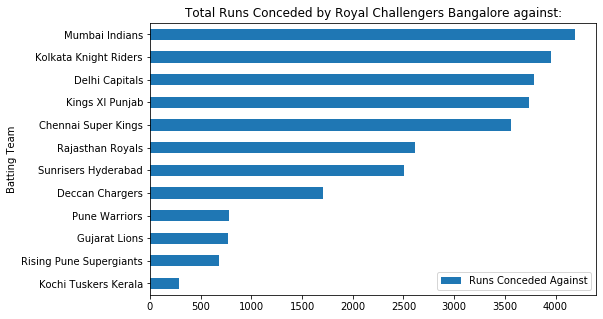

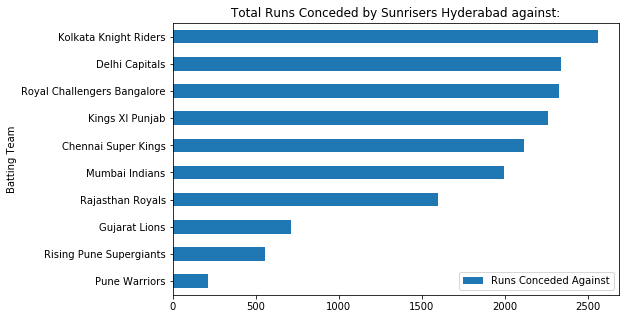

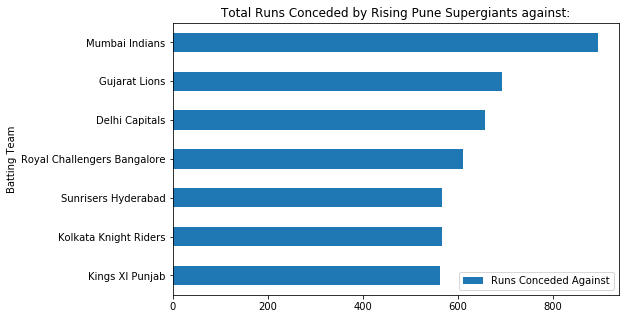

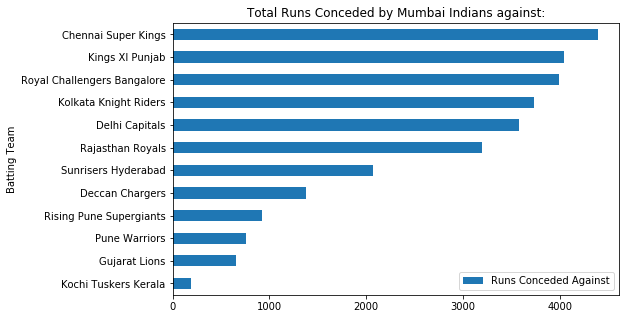

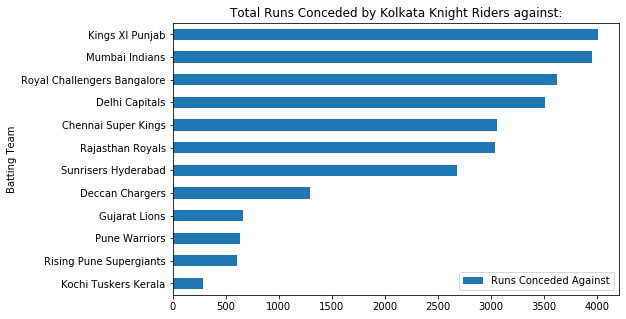

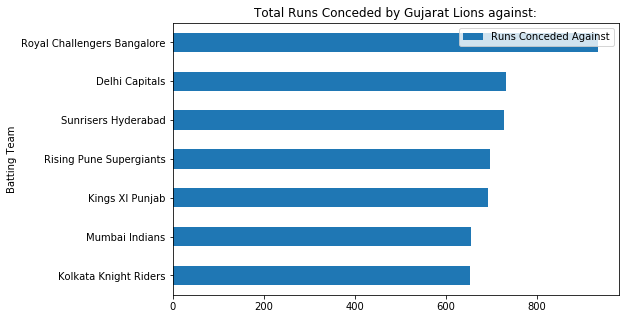

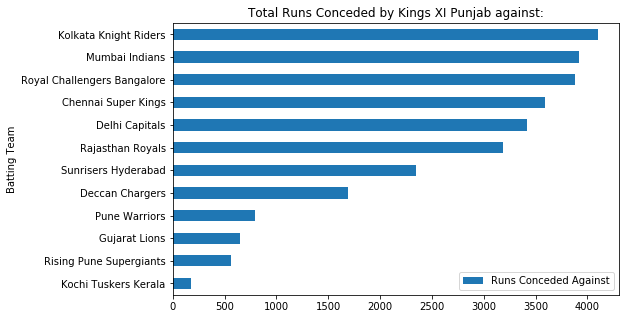

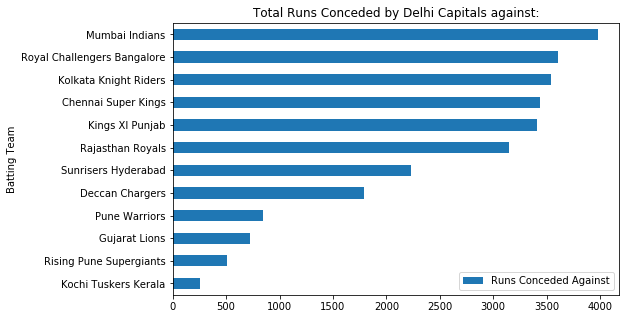

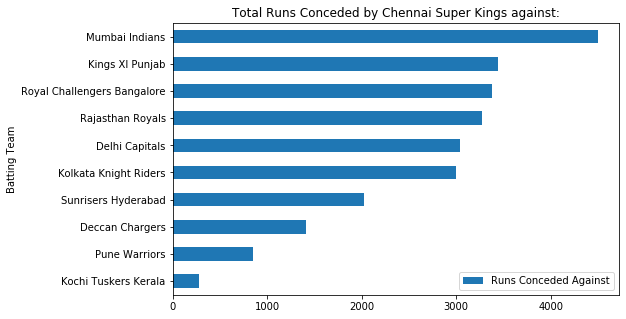

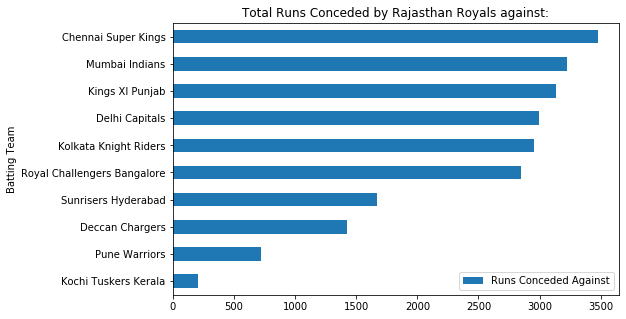

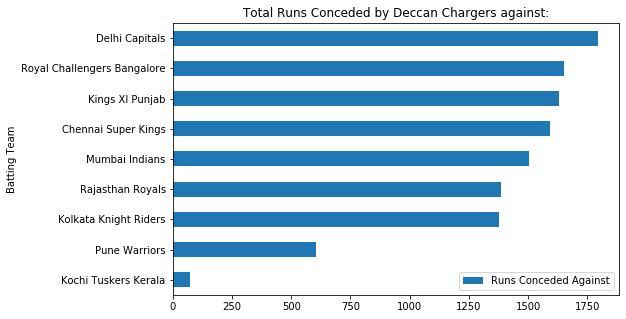

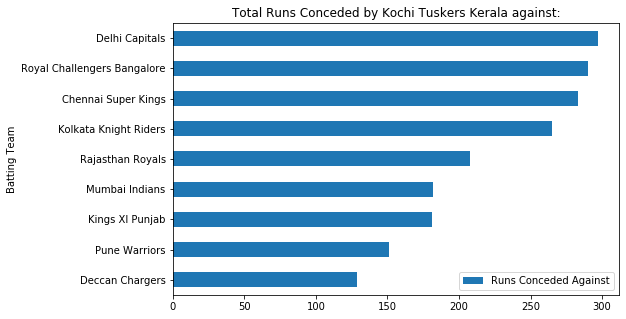

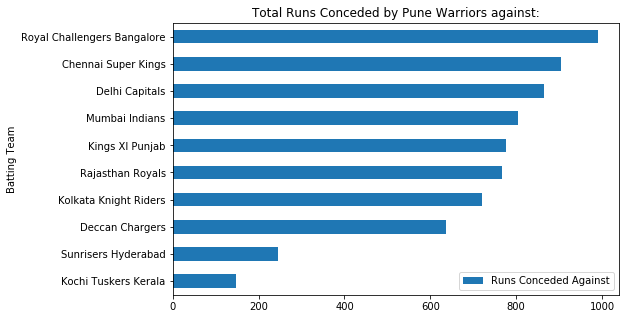

In [21]:
for team in deliveries['bowling_team'].unique():
    temp_df = deliveries[deliveries['bowling_team'] == team].groupby(['batting_team']).agg({'total_runs':sum})
    temp_df.columns = ['Runs Conceded Against']
    temp_df = temp_df.sort_values(by = 'Runs Conceded Against',ascending=True)
    temp_df.index.name = 'Batting Team'
    
    title_str = f'Total Runs Conceded by {team} against:'
    temp_df.plot(kind='barh',figsize=(8,5))
    plt.title(title_str)
    plt.show()

### Run Rate Trend

In [22]:
tot_runs_by_over = deliveries[deliveries['is_super_over'] == 0].groupby('over')['total_runs'].sum()

In [23]:
tot_over = deliveries[deliveries['is_super_over'] == 0]['over'].value_counts()//6

In [24]:
run_per_over = []
for i in range(1,21):
    run_per_over.append(tot_runs_by_over[i]/tot_over[i])
    

In [25]:
Avg_runrate_df = pd.DataFrame({'Over':np.arange(1,21),'Run rate':run_per_over})
Avg_runrate_df

,Over,Run rate
0,1,5.817895
1,2,6.924826
2,3,7.723391
3,4,7.937940
4,5,7.980732
5,6,8.051480
6,7,6.517776
7,8,6.963035
8,9,7.234720
9,10,7.181046


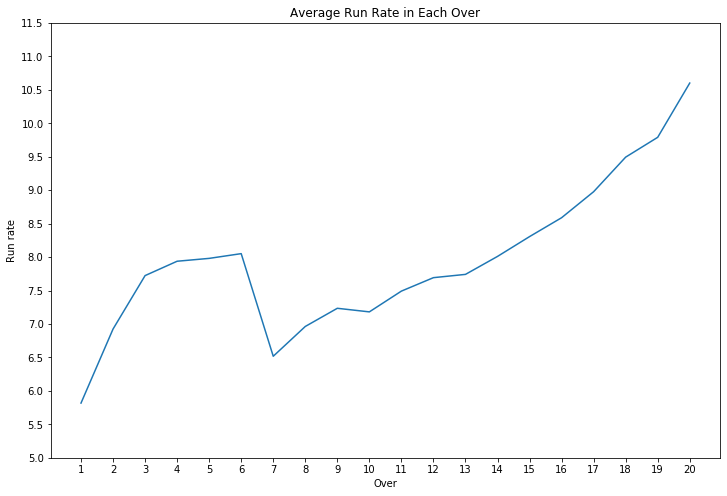

In [26]:
plt.figure(figsize=(12,8))
plt.title('Average Run Rate in Each Over')
sns.lineplot(Avg_runrate_df['Over'],Avg_runrate_df['Run rate'])
plt.xticks(np.arange(1, 21, 1.0))
plt.yticks(np.arange(5, 12, 0.5))
plt.show()

#### Fall of Wickets in Each Over

In [27]:
deliveries['player_dismissed'] = deliveries['player_dismissed'].fillna(0)

In [28]:
deliveries['is_wicket'] = deliveries['player_dismissed'].apply(lambda x:1 if x != 0 else 0)

In [29]:
wicket_by_over = deliveries.groupby('over').agg({'is_wicket':sum})
wicket_by_over.columns= ['Wickets Fallen']
wicket_by_over

,Wickets Fallen
over,
1,306
2,350
3,371
4,385
5,385
6,380
7,308
8,324
9,369


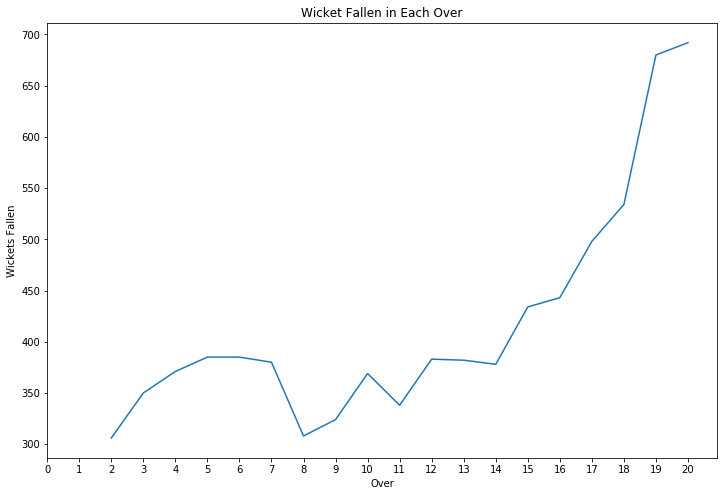

In [30]:
plt.figure(figsize=(12,8))
plt.title('Wicket Fallen in Each Over')
sns.lineplot(Avg_runrate_df['Over'],wicket_by_over['Wickets Fallen'])
plt.xticks(np.arange(0, 21, 1.0))
plt.show()

### Player Analysis

#### Top 10 batsmen by Number of Balls Faced

In [31]:
#legal_deliveries = deliveries[(deliveries['wide_runs'] == 0 ) & (deliveries['noball_runs'] == 0)]
legal_deliveries = deliveries[(deliveries['wide_runs'] == 0 ) ]
legal_deliveries.shape

(173673, 22)

In [32]:
temp_df = pd.DataFrame(legal_deliveries['batsman'].value_counts().head(10))
temp_df.columns = ['Balls Faced']
temp_df

,Balls Faced
V Kohli,4114
SK Raina,3917
RG Sharma,3744
S Dhawan,3671
G Gambhir,3404
RV Uthappa,3384
DA Warner,3306
MS Dhoni,3215
AM Rahane,3136
CH Gayle,2981


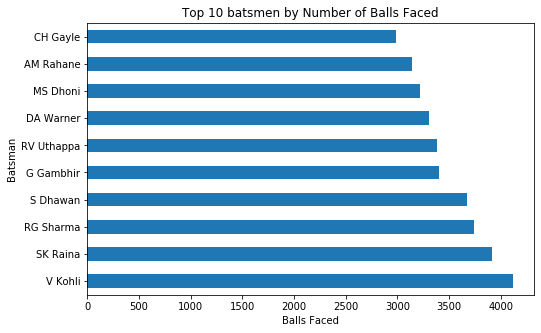

In [33]:
legal_deliveries['batsman'].value_counts().head(10).plot(kind='barh',figsize=(8,5))
plt.title('Top 10 batsmen by Number of Balls Faced')
plt.xlabel('Balls Faced')
plt.ylabel('Batsman')
plt.show()

#### Top 10 Run Scorers

In [34]:
top_10_run_scorers = pd.DataFrame(deliveries.groupby(['batsman'])['batsman_runs'].sum()).sort_values(by='batsman_runs',ascending=False).head(10)
top_10_run_scorers.columns = ['Runs Scored']
top_10_run_scorers

,Runs Scored
batsman,
V Kohli,5434
SK Raina,5415
RG Sharma,4914
DA Warner,4741
S Dhawan,4632
CH Gayle,4560
MS Dhoni,4477
RV Uthappa,4446
AB de Villiers,4428


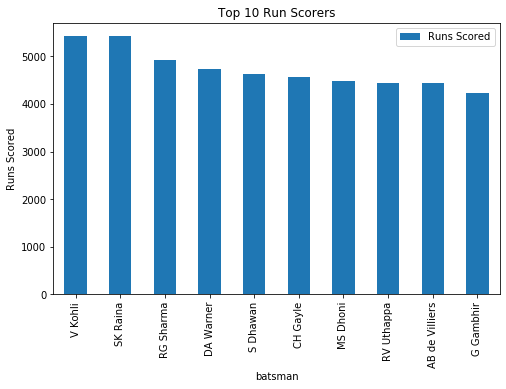

In [35]:
top_10_run_scorers.plot(kind='bar',figsize=(8,5))
plt.title('Top 10 Run Scorers')
plt.ylabel('Runs Scored')
plt.show()

#### Top 10 Wicket Takers

In [36]:
wickets_df = deliveries[deliveries['is_wicket'] == 1]

In [37]:
bowler_wicket_df = wickets_df[(deliveries['dismissal_kind'] != 'retired hurt') 
                              & (deliveries['dismissal_kind'] != 'run out') 
                              & (deliveries['dismissal_kind'] != 'obstructing the field')]

D:\DSE\softwares\anacondapython\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
top_10_wicket_takers = pd.DataFrame(bowler_wicket_df['bowler'].value_counts().head(10))
top_10_wicket_takers.columns = ['Wickets Taken']
top_10_wicket_takers.index.name = 'Bowler'
top_10_wicket_takers

,Wickets Taken
Bowler,
SL Malinga,170
A Mishra,156
Harbhajan Singh,150
PP Chawla,149
DJ Bravo,147
B Kumar,133
R Ashwin,125
SP Narine,122
UT Yadav,119


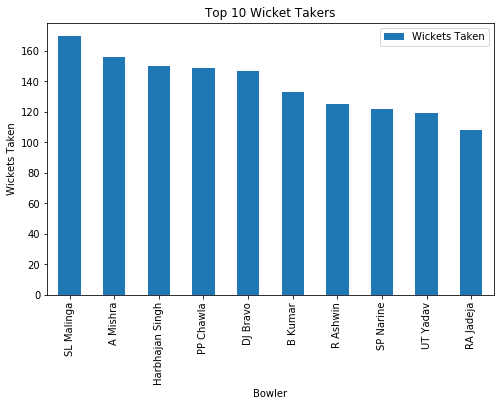

In [39]:
top_10_wicket_takers.plot(kind='bar',figsize=(8,5))
plt.title('Top 10 Wicket Takers')
plt.ylabel('Wickets Taken')
plt.show()

## Strengths and Weakness of Top Run Scoring Batsmen

### Virat Kohli

In [40]:
temp_df = pd.DataFrame(bowler_wicket_df[deliveries['player_dismissed']=='V Kohli']['bowler'].value_counts().head(10))
temp_df.columns = ['Number of dismissals']
temp_df.index.name = 'Bowler'
temp_df

D:\DSE\softwares\anacondapython\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Number of dismissals
Bowler,
A Nehra,6
Sandeep Sharma,5
DS Kulkarni,4
MJ McClenaghan,4
L Balaji,3
M Morkel,3
KA Pollard,3
RA Jadeja,3
JH Kallis,3


#### Virat's best and worst strike rate against bowlers who has bowled him atleast 3 overs

In [41]:
top_bat_df = pd.DataFrame(deliveries[deliveries['batsman'] == 'V Kohli'].groupby('bowler').agg({'batsman_runs':['sum','count']}))
top_bat_df.columns = ['Runs Scored','Balls Faced']
top_bat_df = top_bat_df[top_bat_df['Balls Faced']>18]
top_bat_df['Strike Rate'] = round((top_bat_df['Runs Scored']/top_bat_df['Balls Faced'])*100,2)

#### Virat struggle against

In [42]:
top_bat_df.sort_values(by = 'Strike Rate',ascending = True).head()

,Runs Scored,Balls Faced,Strike Rate
bowler,,,
SK Warne,16,28,57.14
SR Watson,19,26,73.08
MM Patel,20,25,80.00
S Sreesanth,24,30,80.00
JH Kallis,29,35,82.86


#### Virat is the best against

In [43]:
top_bat_df.sort_values(by = 'Strike Rate',ascending = False).head()

,Runs Scored,Balls Faced,Strike Rate
bowler,,,
S Kaushik,50,23,217.39
KV Sharma,79,37,213.51
UT Yadav,141,83,169.88
Sandeep Sharma,61,36,169.44
PJ Sangwan,33,20,165.00


### Suresh Raina

In [44]:
temp_df = pd.DataFrame(bowler_wicket_df[deliveries['player_dismissed']=='SK Raina']['bowler'].value_counts().head(10))
temp_df.columns = ['Number of dismissals']
temp_df.index.name = 'Bowler'
temp_df

D:\DSE\softwares\anacondapython\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Number of dismissals
Bowler,
Harbhajan Singh,5
DJ Bravo,4
PP Chawla,4
YS Chahal,4
A Mishra,4
SK Warne,3
Rashid Khan,3
P Kumar,3
YK Pathan,3


#### Raina's best and worst strike rate against bowlers who has bowled him atleast 3 overs

In [45]:
top_bat_df = pd.DataFrame(deliveries[deliveries['batsman'] == 'SK Raina'].groupby('bowler').agg({'batsman_runs':['sum','count']}))
top_bat_df.columns = ['Runs Scored','Balls Faced']
top_bat_df = top_bat_df[top_bat_df['Balls Faced']>18]
top_bat_df['Strike Rate'] = round((top_bat_df['Runs Scored']/top_bat_df['Balls Faced'])*100,2)

#### Raina struggle against

In [46]:
top_bat_df.sort_values(by = 'Strike Rate',ascending = True).head()

,Runs Scored,Balls Faced,Strike Rate
bowler,,,
A Nehra,15,26,57.69
A Kumble,13,21,61.90
GJ Maxwell,13,20,65.00
HV Patel,23,31,74.19
R Ashwin,38,44,86.36


#### Raina is the best against

In [47]:
top_bat_df.sort_values(by = 'Strike Rate',ascending = False).head()

,Runs Scored,Balls Faced,Strike Rate
bowler,,,
P Awana,51,24,212.50
CR Woakes,41,20,205.00
Sandeep Sharma,80,41,195.12
I Sharma,81,42,192.86
Iqbal Abdulla,55,30,183.33


### Rohit Sharma

In [48]:
temp_df = pd.DataFrame(bowler_wicket_df[deliveries['player_dismissed']=='RG Sharma']['bowler'].value_counts().head(10))
temp_df.columns = ['Number of dismissals']
temp_df.index.name = 'Bowler'
temp_df

D:\DSE\softwares\anacondapython\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Number of dismissals
Bowler,
SP Narine,6
A Mishra,6
R Vinay Kumar,6
DJ Bravo,5
DS Kulkarni,4
SK Trivedi,4
UT Yadav,4
RA Jadeja,3
I Sharma,3


#### Rohit's best and worst strike rate against bowlers who has bowled him atleast 3 overs

In [49]:
top_bat_df = pd.DataFrame(deliveries[deliveries['batsman'] == 'RG Sharma'].groupby('bowler').agg({'batsman_runs':['sum','count']}))
top_bat_df.columns = ['Runs Scored','Balls Faced']
top_bat_df = top_bat_df[top_bat_df['Balls Faced']>18]
top_bat_df['Strike Rate'] = round((top_bat_df['Runs Scored']/top_bat_df['Balls Faced'])*100,2)

#### Rohit struggle against

In [50]:
top_bat_df.sort_values(by = 'Strike Rate',ascending = True).head()

,Runs Scored,Balls Faced,Strike Rate
bowler,,,
R Sharma,11,19,57.89
YK Pathan,12,19,63.16
STR Binny,12,19,63.16
R Vinay Kumar,22,34,64.71
AR Patel,21,29,72.41


#### Rohit is the best against

In [51]:
top_bat_df.sort_values(by = 'Strike Rate',ascending = False).head(5)

,Runs Scored,Balls Faced,Strike Rate
bowler,,,
DT Christian,70,32,218.75
VR Aaron,59,28,210.71
CJ Anderson,45,22,204.55
Gagandeep Singh,50,26,192.31
NLTC Perera,40,21,190.48


### David Warner

In [52]:
temp_df = pd.DataFrame(bowler_wicket_df[deliveries['player_dismissed']=='DA Warner']['bowler'].value_counts().head(10))
temp_df.columns = ['Number of dismissals']
temp_df.index.name = 'Bowler'
temp_df

D:\DSE\softwares\anacondapython\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Number of dismissals
Bowler,
Harbhajan Singh,4
UT Yadav,3
BW Hilfenhaus,3
L Balaji,3
P Kumar,3
Kuldeep Yadav,2
DS Kulkarni,2
Z Khan,2
R Ashwin,2


#### David Warner's best and worst strike rate against bowlers who has bowled him atleast 3 overs

In [53]:
top_bat_df = pd.DataFrame(deliveries[deliveries['batsman'] == 'DA Warner'].groupby('bowler').agg({'batsman_runs':['sum','count']}))
top_bat_df.columns = ['Runs Scored','Balls Faced']
top_bat_df = top_bat_df[top_bat_df['Balls Faced']>18]
top_bat_df['Strike Rate'] = round((top_bat_df['Runs Scored']/top_bat_df['Balls Faced'])*100,2)

#### Warner struggle against

In [54]:
top_bat_df.sort_values(by = 'Strike Rate',ascending = True).head()

,Runs Scored,Balls Faced,Strike Rate
bowler,,,
S Sreesanth,20,26,76.92
DJ Hussey,21,27,77.78
JD Unadkat,23,29,79.31
RJ Harris,22,25,88.00
JP Duminy,20,22,90.91


#### Warner is the best against

In [55]:
top_bat_df.sort_values(by = 'Strike Rate',ascending = False).head()

,Runs Scored,Balls Faced,Strike Rate
bowler,,,
KW Richardson,56,21,266.67
MG Johnson,51,22,231.82
KC Cariappa,51,24,212.50
M Ur Rahman,51,26,196.15
HV Patel,63,33,190.91


### MS Dhoni

In [56]:
temp_df = pd.DataFrame(bowler_wicket_df[deliveries['player_dismissed']=='MS Dhoni']['bowler'].value_counts().head(10))
temp_df.columns = ['Number of dismissals']
temp_df.index.name = 'Bowler'
temp_df

D:\DSE\softwares\anacondapython\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Number of dismissals
Bowler,
Z Khan,7
PP Ojha,6
KA Pollard,3
JJ Bumrah,3
SR Watson,3
RE van der Merwe,2
DP Nannes,2
AB Dinda,2
PP Chawla,2


#### MS Dhoni's best and worst strike rate against bowlers who has bowled him atleast 3 overs

In [57]:
top_bat_df = pd.DataFrame(deliveries[deliveries['batsman'] == 'MS Dhoni'].groupby('bowler').agg({'batsman_runs':['sum','count']}))
top_bat_df.columns = ['Runs Scored','Balls Faced']
top_bat_df = top_bat_df[top_bat_df['Balls Faced']>18]
top_bat_df['Strike Rate'] = round((top_bat_df['Runs Scored']/top_bat_df['Balls Faced'])*100,2)

#### Dhoni  struggle against

In [58]:
top_bat_df.sort_values(by = 'Strike Rate',ascending = True).head()

,Runs Scored,Balls Faced,Strike Rate
bowler,,,
SP Narine,30,59,50.85
Rashid Khan,14,22,63.64
HV Patel,22,29,75.86
HH Pandya,22,27,81.48
DL Vettori,23,28,82.14


#### Dhoni is the best against

In [59]:
top_bat_df.sort_values(by = 'Strike Rate',ascending = False).head()

,Runs Scored,Balls Faced,Strike Rate
bowler,,,
JD Unadkat,84,37,227.03
TA Boult,77,36,213.89
MM Sharma,48,23,208.70
LR Shukla,37,19,194.74
IK Pathan,80,42,190.48


### CH Gayle

In [60]:
temp_df = pd.DataFrame(bowler_wicket_df[deliveries['player_dismissed']=='CH Gayle']['bowler'].value_counts().head(10))
temp_df.columns = ['Number of dismissals']
temp_df.index.name = 'Bowler'
temp_df

D:\DSE\softwares\anacondapython\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Number of dismissals
Bowler,
Harbhajan Singh,5
Sandeep Sharma,4
R Ashwin,4
UT Yadav,4
DS Kulkarni,3
Z Khan,3
SR Watson,3
CH Morris,3
MM Patel,2


#### CH Gayle's best and worst strike rate against bowlers who has bowled him atleast 3 overs

In [61]:
top_bat_df = pd.DataFrame(deliveries[deliveries['batsman'] == 'CH Gayle'].groupby('bowler').agg({'batsman_runs':['sum','count']}))
top_bat_df.columns = ['Runs Scored','Balls Faced']
top_bat_df = top_bat_df[top_bat_df['Balls Faced']>18]
top_bat_df['Strike Rate'] = round((top_bat_df['Runs Scored']/top_bat_df['Balls Faced'])*100,2)

#### Gayle  struggle against

In [62]:
top_bat_df.sort_values(by = 'Strike Rate',ascending = True).head()

,Runs Scored,Balls Faced,Strike Rate
bowler,,,
JJ Bumrah,30,45,66.67
SR Watson,21,28,75.00
SL Malinga,57,74,77.03
SP Narine,48,58,82.76
R Ashwin,49,59,83.05


#### Gayle is the best against

In [63]:
top_bat_df.sort_values(by = 'Strike Rate',ascending = False).head()

,Runs Scored,Balls Faced,Strike Rate
bowler,,,
JD Unadkat,72,28,257.14
MS Gony,74,29,255.17
Kamran Khan,49,20,245.00
Rashid Khan,43,19,226.32
A Mishra,67,32,209.38


In [64]:
##deliveries[(deliveries['match_id'] == 11153) & (deliveries['batsman'] == 'AD Russell')].T

### Getting details of each innings of every batsman from the 'deliveries' dataset.

In [65]:
batsman_innings_df = pd.DataFrame()
for batsman in deliveries['batsman'].unique():
    batsman_df = deliveries[deliveries['batsman']==batsman]
    match_no = []
    batsman_name = []
    batting_team = []
    bowling_team = []
    balls_faced = []
    sixes = []
    fours = []
    runs = []
    strike_rate = []
    dismissal_type = []
    for match in batsman_df['match_id'].unique():
        match_no.append(match)
        batsman_name.append(batsman)
        batsman_match_df = batsman_df[batsman_df['match_id']==match]
        batting_team.append(batsman_match_df['batting_team'].mode()[0])
        bowling_team.append(batsman_match_df['bowling_team'].mode()[0])
        balls_faced.append(batsman_match_df[(batsman_match_df['wide_runs']==0)].shape[0])
        sixes.append(batsman_match_df[batsman_match_df['batsman_runs']>5].shape[0])
        fours.append(batsman_match_df[(batsman_match_df['batsman_runs']>3) & (batsman_match_df['batsman_runs']<6)].shape[0])
        runs.append(batsman_match_df[(batsman_match_df['wide_runs']==0)]['batsman_runs'].sum())
        if balls_faced[-1] == 0:
            strike_rate.append(round((runs[-1]/(balls_faced[-1]+1))*100,2))
        else:
            strike_rate.append(round((runs[-1]/balls_faced[-1])*100,2))
        is_out = batsman_match_df[(batsman_match_df['is_wicket'] == 1) & (batsman_match_df['player_dismissed']==batsman)].shape[0]
        if is_out == 1:
            dismissal_type.append(batsman_match_df[(batsman_match_df['is_wicket'] == 1) & 
                                                   (batsman_match_df['player_dismissed']==batsman)]['dismissal_kind'].values[0])
        else:
            dismissal_type.append('Not Out')
            
    batsman_innings_df =pd.concat([batsman_innings_df,pd.DataFrame({
        'Match_Id':match_no,
        'Batsman':batsman_name,
        'batting_team':batting_team,
        'bowling_team':bowling_team,
        'balls_faced':balls_faced,
        'sixes':sixes,
        'fours':fours,
        'runs':runs,
        'strike_rate':strike_rate,
        'dismissal_type':dismissal_type
        
    })],axis=0)
        
    

In [66]:
batsman_innings_df.to_csv('Batsman Innings IPL 08-19.csv')

In [67]:
batsman_innings_df.shape

(11294, 10)

In [68]:
batsman_innings_df.head()

,Match_Id,Batsman,batting_team,bowling_team,balls_faced,sixes,fours,runs,strike_rate,dismissal_type
0,1,DA Warner,Sunrisers Hyderabad,Royal Challengers Bangalore,8,1,2,14,175.00,caught
1,6,DA Warner,Sunrisers Hyderabad,Gujarat Lions,45,4,6,76,168.89,Not Out
2,10,DA Warner,Sunrisers Hyderabad,Mumbai Indians,34,2,7,49,144.12,caught
3,14,DA Warner,Sunrisers Hyderabad,Kolkata Knight Riders,30,0,4,26,86.67,caught
4,19,DA Warner,Sunrisers Hyderabad,Kings XI Punjab,54,2,7,70,129.63,Not Out


#### Innings with best strike rate where batsman faced atleast 6 balls.

In [69]:
batsman_innings_df[batsman_innings_df['balls_faced']>6].sort_values(by = 'strike_rate',ascending = False).head()

,Match_Id,Batsman,batting_team,bowling_team,balls_faced,sixes,fours,runs,strike_rate,dismissal_type
1,9,CH Morris,Delhi Capitals,Rising Pune Supergiants,9,3,4,38,422.22,Not Out
46,320,JA Morkel,Chennai Super Kings,Royal Challengers Bangalore,7,3,2,28,400.00,caught
65,411,AB de Villiers,Royal Challengers Bangalore,Pune Warriors,8,3,3,31,387.50,caught
3,80,B Akhil,Royal Challengers Bangalore,Deccan Chargers,7,3,2,27,385.71,Not Out
42,11153,AD Russell,Kolkata Knight Riders,Royal Challengers Bangalore,13,7,1,49,376.92,Not Out


#### Most number of sixes in an innings

In [70]:
batsman_innings_df.sort_values(by = ['sixes','runs'],ascending = False).head()

,Match_Id,Batsman,batting_team,bowling_team,balls_faced,sixes,fours,runs,strike_rate,dismissal_type
57,411,CH Gayle,Royal Challengers Bangalore,Pune Warriors,66,17,13,175,265.15,Not Out
11,60,BB McCullum,Kolkata Knight Riders,Royal Challengers Bangalore,73,13,10,158,216.44,Not Out
49,372,CH Gayle,Royal Challengers Bangalore,Delhi Capitals,62,13,7,128,206.45,Not Out
112,620,AB de Villiers,Royal Challengers Bangalore,Gujarat Lions,52,12,10,129,248.08,Not Out
83,557,CH Gayle,Royal Challengers Bangalore,Kings XI Punjab,57,12,7,117,205.26,caught and bowled


#### Most number of fours in an innings

In [71]:
batsman_innings_df.sort_values(by = ['fours','runs'],ascending = False).head()

,Match_Id,Batsman,batting_team,bowling_team,balls_faced,sixes,fours,runs,strike_rate,dismissal_type
97,562,AB de Villiers,Royal Challengers Bangalore,Mumbai Indians,59,4,19,133,225.42,Not Out
3,243,PC Valthaty,Kings XI Punjab,Chennai Super Kings,63,2,19,120,190.48,Not Out
32,311,AM Rahane,Rajasthan Royals,Kings XI Punjab,66,1,16,98,148.48,bowled
8,212,MJ Lumb,Rajasthan Royals,Kings XI Punjab,43,2,16,83,193.02,caught
34,7935,RR Pant,Delhi Capitals,Sunrisers Hyderabad,63,7,15,129,204.76,Not Out


#### Most Runs in an innings

In [72]:
batsman_innings_df.sort_values(by = 'runs',ascending = False).head()

,Match_Id,Batsman,batting_team,bowling_team,balls_faced,sixes,fours,runs,strike_rate,dismissal_type
57,411,CH Gayle,Royal Challengers Bangalore,Pune Warriors,66,17,13,175,265.15,Not Out
11,60,BB McCullum,Kolkata Knight Riders,Royal Challengers Bangalore,73,13,10,158,216.44,Not Out
97,562,AB de Villiers,Royal Challengers Bangalore,Mumbai Indians,59,4,19,133,225.42,Not Out
112,620,AB de Villiers,Royal Challengers Bangalore,Gujarat Lions,52,12,10,129,248.08,Not Out
34,7935,RR Pant,Delhi Capitals,Sunrisers Hyderabad,63,7,15,129,204.76,Not Out


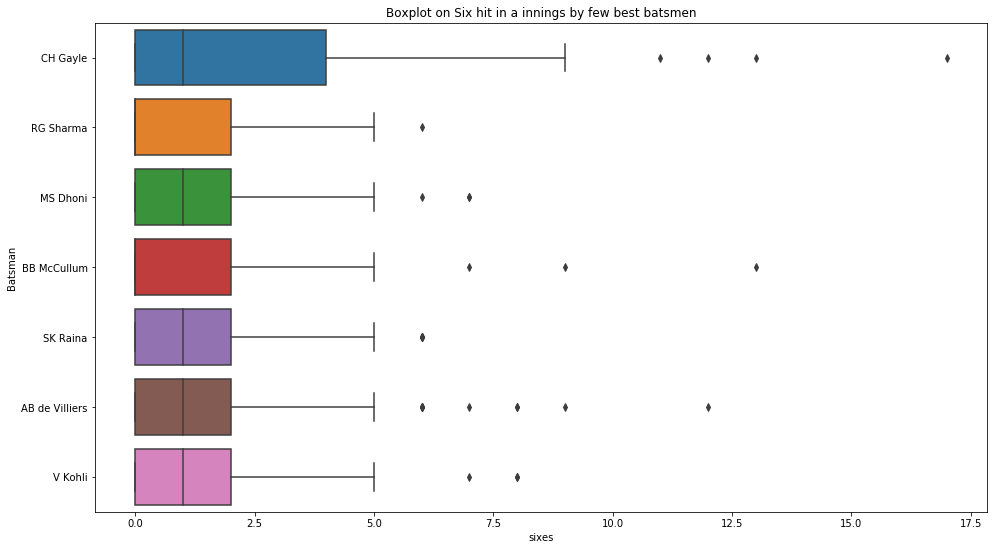

In [73]:
plt.figure(figsize=(16,9))
plt.title('Boxplot on Six hit in a innings by few best batsmen')
sns.boxplot(x='sixes',y='Batsman',data=
           batsman_innings_df[
               (batsman_innings_df['Batsman'] == 'CH Gayle') |
               (batsman_innings_df['Batsman'] == 'BB McCullum') |
               (batsman_innings_df['Batsman'] == 'RG Sharma') |
               (batsman_innings_df['Batsman'] == 'AB de Villiers') |
               (batsman_innings_df['Batsman'] == 'V Kohli') |
               (batsman_innings_df['Batsman'] == 'SK Raina') |
               (batsman_innings_df['Batsman'] == 'MS Dhoni')
           ])
plt.show()

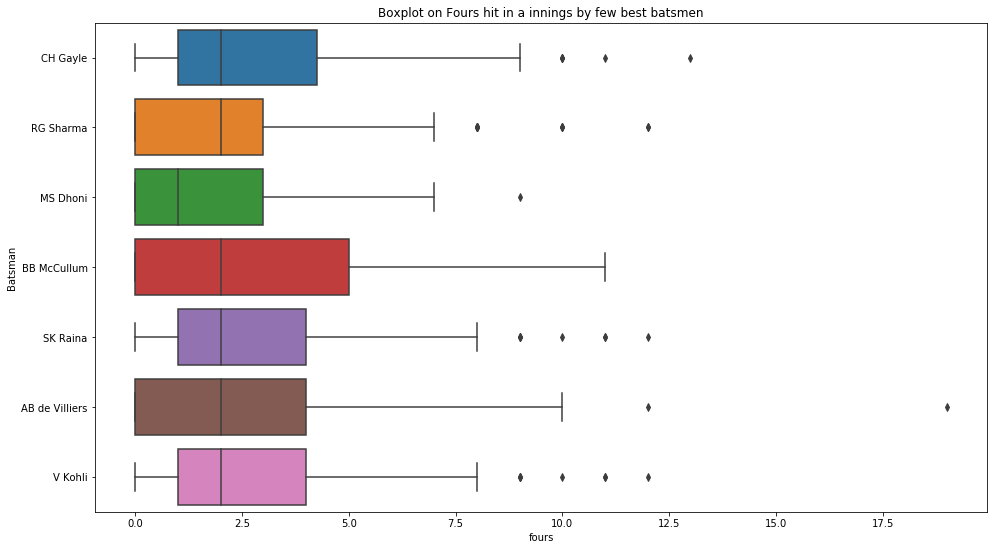

In [74]:
plt.figure(figsize=(16,9))
plt.title('Boxplot on Fours hit in a innings by few best batsmen')
sns.boxplot(x='fours',y='Batsman',data=
           batsman_innings_df[
               (batsman_innings_df['Batsman'] == 'CH Gayle') |
               (batsman_innings_df['Batsman'] == 'BB McCullum') |
               (batsman_innings_df['Batsman'] == 'RG Sharma') |
               (batsman_innings_df['Batsman'] == 'AB de Villiers') |
               (batsman_innings_df['Batsman'] == 'V Kohli') |
               (batsman_innings_df['Batsman'] == 'SK Raina') |
               (batsman_innings_df['Batsman'] == 'MS Dhoni')
           ])
plt.show()

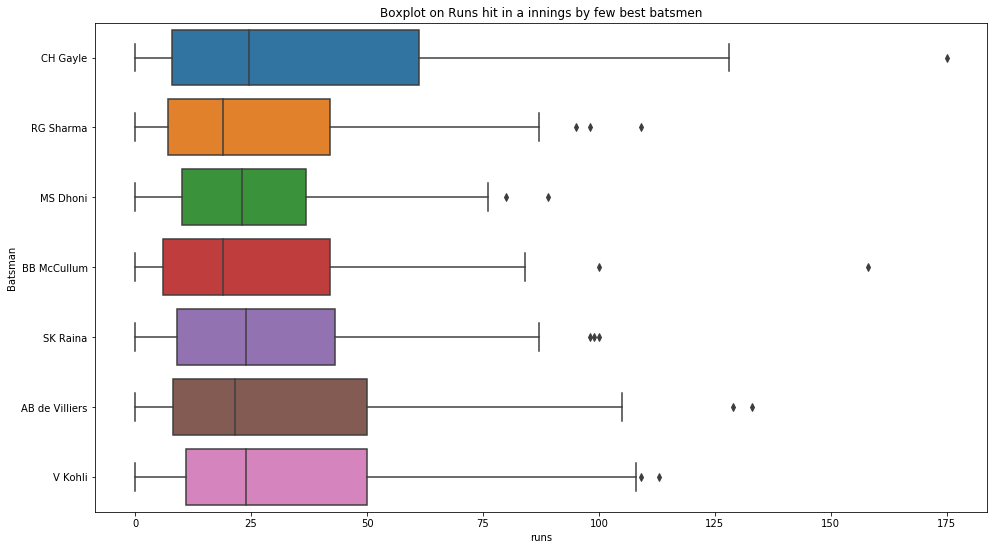

In [75]:
plt.figure(figsize=(16,9))
plt.title('Boxplot on Runs hit in a innings by few best batsmen')
sns.boxplot(x='runs',y='Batsman',data=
           batsman_innings_df[
               (batsman_innings_df['Batsman'] == 'CH Gayle') |
               (batsman_innings_df['Batsman'] == 'BB McCullum') |
               (batsman_innings_df['Batsman'] == 'RG Sharma') |
               (batsman_innings_df['Batsman'] == 'AB de Villiers') |
               (batsman_innings_df['Batsman'] == 'V Kohli') |
               (batsman_innings_df['Batsman'] == 'SK Raina') |
               (batsman_innings_df['Batsman'] == 'MS Dhoni')
           ])
plt.show()

#### Bowlers with most number of dot balls

In [76]:
dot_balls_df = pd.DataFrame(deliveries[deliveries['total_runs'] == 0]['bowler'].value_counts().head(10))
dot_balls_df.columns = ['Number of dot balls']
dot_balls_df.index.name = 'Bowler'

In [77]:
num_of_balls_bowled = []
for bowler in dot_balls_df.index:
    num_of_balls_bowled.append(deliveries[deliveries['bowler'] == bowler].shape[0])
    

In [78]:
dot_balls_df['Total Number of Balls Bowled'] = num_of_balls_bowled
dot_balls_df['Dot Ball %'] = round((dot_balls_df['Number of dot balls']/dot_balls_df['Total Number of Balls Bowled'])*100,2)

In [79]:
dot_balls_df

,Number of dot balls,Total Number of Balls Bowled,Dot Ball %
Bowler,,,
Harbhajan Singh,1244,3451,36.05
SL Malinga,1144,2974,38.47
B Kumar,1116,2707,41.23
A Mishra,1108,3172,34.93
PP Chawla,1100,3157,34.84
P Kumar,1075,2637,40.77
R Ashwin,1067,3016,35.38
SP Narine,1038,2600,39.92
DW Steyn,996,2207,45.13


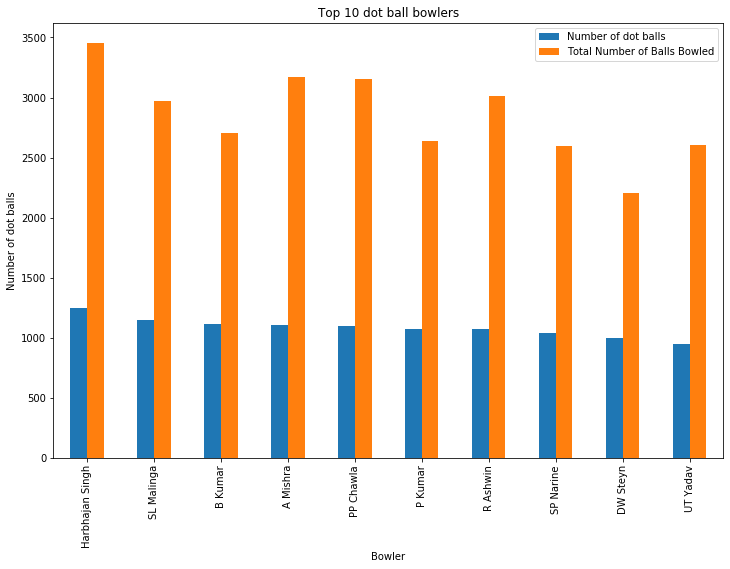

In [99]:
dot_balls_df[['Number of dot balls','Total Number of Balls Bowled']].plot(kind='bar',figsize=(12,8))
plt.title('Top 10 dot ball bowlers')
plt.ylabel('Number of dot balls')
plt.show()

### Analysis of Bowler that has bowled more than 100 overs

In [81]:
#considering bowlers who has bowled more than 100 overs
bowler_list = []
tot_balls_list = []
tot_runs_list = []
dot_balls_list  = []
dot_ball_perc_list  = []
runs_per_ball_list  = []
runs_per_over_list  = []
tot_wickets_list  = []
for bowler in deliveries['bowler'].unique():
    bowler_df = deliveries[deliveries['bowler'] == bowler]
    if bowler_df.shape[0]>=600:
        bowler_list.append(bowler)
        
        tot_balls = bowler_df.shape[0]
        tot_overs = tot_balls//6 + (tot_balls%6)/10
        tot_balls_list.append(tot_overs)
        
        
        
        tot_runs = bowler_df['total_runs'].sum() - bowler_df['legbye_runs'].sum() - bowler_df['bye_runs'].sum() - bowler_df['penalty_runs'].sum()
        tot_runs_list.append(tot_runs)
        
        dot_balls = bowler_df[bowler_df['total_runs']==0].shape[0]
        dot_balls_list.append(dot_balls)
        
        dot_ball_perc_list.append(round((dot_balls/tot_balls)*100,2))
        
        runs_per_ball_list.append(tot_runs/tot_balls)
        
        runs_per_over_list.append(round((tot_runs/tot_overs),2))
        
        tot_wickets_list.append(bowler_wicket_df[bowler_wicket_df['bowler']==bowler].shape[0])
        
        

In [82]:
bowler_details_df = pd.DataFrame({
    'Bowler' : bowler_list,
    'Total Overs': tot_balls_list,
    'Total Runs Conceded': tot_runs_list,
    'Total Dot Balls' : dot_balls_list,
    'Dot Ball Percentage' : dot_ball_perc_list,
    'Avg Runs Conceded/Ball' : runs_per_ball_list,
    'Economy' : runs_per_over_list,
    'Wickets Taken' : tot_wickets_list
})

#### Top 5 Wicket Takers

In [83]:
bowler_details_df.sort_values(by = 'Wickets Taken',ascending = False).head()

,Bowler,Total Overs,Total Runs Conceded,Total Dot Balls,Dot Ball Percentage,Avg Runs Conceded/Ball,Economy,Wickets Taken
39,SL Malinga,495.4,3390,1144,38.47,1.139879,6.84,170
35,A Mishra,528.4,3804,1108,34.93,1.199243,7.20,156
40,Harbhajan Singh,575.1,3979,1244,36.05,1.152999,6.92,150
20,PP Chawla,526.1,4086,1100,34.84,1.294267,7.77,149
72,DJ Bravo,451.5,3662,825,30.43,1.350793,8.11,147


#### Top 5 Economic Bowlers

In [84]:
bowler_details_df.sort_values(by = 'Economy',ascending = True).head()

,Bowler,Total Overs,Total Runs Conceded,Total Dot Balls,Dot Ball Percentage,Avg Runs Conceded/Ball,Economy,Wickets Taken
73,A Kumble,163.5,1058,374,38.05,1.076297,6.47,45
65,M Muralitharan,263.3,1706,600,37.95,1.079064,6.48,64
74,DW Steyn,367.5,2395,996,45.13,1.085184,6.52,96
82,R Ashwin,502.4,3337,1067,35.38,1.106432,6.64,125
21,SP Narine,433.2,2884,1038,39.92,1.109231,6.66,122


#### Top 5 Bowlers with highest dot ball percentage

In [85]:
bowler_details_df.sort_values(by = 'Dot Ball Percentage',ascending = False).head()

,Bowler,Total Overs,Total Runs Conceded,Total Dot Balls,Dot Ball Percentage,Avg Runs Conceded/Ball,Economy,Wickets Taken
74,DW Steyn,367.5,2395,996,45.13,1.085184,6.52,96
9,DL Chahar,121.2,914,328,45.05,1.255495,7.54,33
47,MM Patel,230.2,1698,590,42.69,1.228654,7.38,74
85,DE Bollinger,100.0,693,254,42.33,1.155000,6.93,37
64,S Sreesanth,157.5,1194,399,42.13,1.260824,7.58,40


#### Top 5 Bowlers with least Average Runs per Ball

In [86]:
bowler_details_df.sort_values(by = 'Avg Runs Conceded/Ball',ascending = True).head()

,Bowler,Total Overs,Total Runs Conceded,Total Dot Balls,Dot Ball Percentage,Avg Runs Conceded/Ball,Economy,Wickets Taken
73,A Kumble,163.5,1058,374,38.05,1.076297,6.47,45
65,M Muralitharan,263.3,1706,600,37.95,1.079064,6.48,64
74,DW Steyn,367.5,2395,996,45.13,1.085184,6.52,96
82,R Ashwin,502.4,3337,1067,35.38,1.106432,6.64,125
21,SP Narine,433.2,2884,1038,39.92,1.109231,6.66,122


#### Bowlers with worst economy

In [87]:
bowler_details_df.sort_values(by = 'Economy',ascending = False).head()

,Bowler,Total Overs,Total Runs Conceded,Total Dot Balls,Dot Ball Percentage,Avg Runs Conceded/Ball,Economy,Wickets Taken
14,HH Pandya,152.2,1358,287,31.40,1.485777,8.92,42
46,SN Thakur,124.1,1096,263,35.30,1.471141,8.83,36
49,Mohammed Shami,179.1,1565,356,33.12,1.455814,8.74,40
89,AD Russell,178.4,1557,362,33.77,1.452425,8.73,55
48,JD Unadkat,256.5,2218,506,32.84,1.439325,8.65,77


#### Bowlers with Least Dot Ball Percentage

In [88]:
bowler_details_df.sort_values(by = 'Dot Ball Percentage',ascending = True).head()

,Bowler,Total Overs,Total Runs Conceded,Total Dot Balls,Dot Ball Percentage,Avg Runs Conceded/Ball,Economy,Wickets Taken
18,KA Pollard,212.4,1770,327,25.63,1.387147,8.33,56
12,R Bhatia,276.5,2020,436,26.25,1.216135,7.31,71
50,AD Mathews,134.3,1079,224,27.76,1.337051,8.03,27
52,Yuvraj Singh,147.0,1078,258,29.25,1.222222,7.33,36
22,Kuldeep Yadav,139.4,1161,246,29.36,1.385442,8.33,39


## Match Analysis



In [89]:
matches.head(3).T

,0,1,2
id,1,2,3
season,2017,2017,2017
city,Hyderabad,Pune,Rajkot
date,2017-04-05,2017-04-06,2017-04-07
team1,Sunrisers Hyderabad,Mumbai Indians,Gujarat Lions
team2,Royal Challengers Bangalore,Rising Pune Supergiant,Kolkata Knight Riders
toss_winner,Royal Challengers Bangalore,Rising Pune Supergiant,Kolkata Knight Riders
toss_decision,field,field,field
result,normal,normal,normal
dl_applied,0,0,0


In [90]:
matches.replace(to_replace=['Delhi Daredevils','Rising Pune Supergiant'],
                   value=['Delhi Capitals','Rising Pune Supergiants'],inplace=True)

In [91]:
team_wins = pd.DataFrame(matches['winner'].value_counts())
team_wins.index.name= 'Team'
team_wins.columns = ['Number of Wins']
team_wins

,Number of Wins
Team,
Mumbai Indians,109
Chennai Super Kings,100
Kolkata Knight Riders,92
Royal Challengers Bangalore,84
Kings XI Punjab,82
Delhi Capitals,77
Rajasthan Royals,75
Sunrisers Hyderabad,58
Deccan Chargers,29


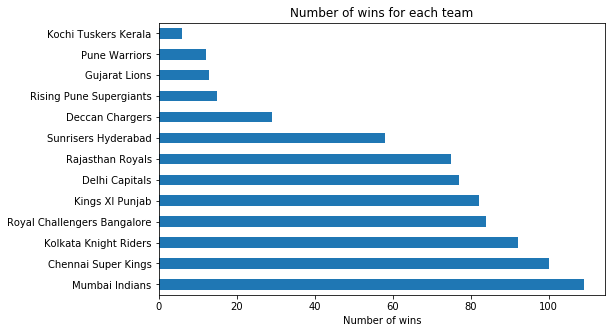

In [92]:
matches['winner'].value_counts().plot(kind='barh',figsize=(8,5))
plt.title('Number of wins for each team')
plt.xlabel('Number of wins')
plt.show()

#### Mumbai Indians is the most successful team in IPL with 109 wins.

### The Toss

In [93]:
import scipy.stats as stats

#### Toss Winning Team vs Match Winning Team

In [100]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [108]:
len(team_l)

13

In [114]:
match_won = []
toss_won = []
team_l = []
Win_perc = []
for team in matches['toss_winner'].unique():
    team_l.append(team)
    toss_winner_df = matches[matches['toss_winner'] == team]
    won_match_and_toss = toss_winner_df[toss_winner_df['winner'] == team]
    match_won.append(won_match_and_toss.shape[0])
    toss_won.append(toss_winner_df.shape[0])
    Win_perc.append(round((won_match_and_toss.shape[0]/toss_winner_df.shape[0])*100,2))
    
pd.DataFrame({'Team':team_l,'Matches Won After Winning Toss':match_won,'Total Tosses Won':toss_won,'Won match after winning toss %':Win_perc}).sort_values(by='Won match after winning toss %',ascending=False)

,Team,Matches Won After Winning Toss,Total Tosses Won,Won match after winning toss %
6,Gujarat Lions,10,15,66.67
8,Chennai Super Kings,57,89,64.04
1,Rising Pune Supergiants,8,13,61.54
2,Kolkata Knight Riders,53,92,57.61
5,Mumbai Indians,56,98,57.14
9,Rajasthan Royals,42,80,52.50
0,Royal Challengers Bangalore,41,81,50.62
4,Sunrisers Hyderabad,23,46,50.00
11,Kochi Tuskers Kerala,4,8,50.00
7,Delhi Capitals,42,90,46.67


#### Does winning the toss affect the result of the match?

In [95]:
toss_and_match_won = 0 
for i in range(matches.shape[0]):
    if matches.loc[i,'toss_winner'] == matches.loc[i,'winner']:
        toss_and_match_won= toss_and_match_won + 1

In [96]:
print(f"In {toss_and_match_won} matches, the team that won the toss won the match also.")
print(f"Total number of matches played: {matches.shape[0]}")
print(f"Therefore, the number of matches where the team that lost the toss won the match is: {matches.shape[0] - toss_and_match_won}")

In 393 matches, the team that won the toss won the match also.
Total number of matches played: 756
Therefore, the number of matches where the team that lost the toss won the match is: 363


In [97]:
toss_vs_result = pd.DataFrame({'Won_match':[393,363],'Lost_match':[363,393]},index=['Won_toss','Lost_toss'])
toss_vs_result

,Won_match,Lost_match
Won_toss,393,363
Lost_toss,363,393


#### Doing chi2 test to statistically prove whether toss affect the result

In [98]:
stats.chi2_contingency(toss_vs_result)

(2.2248677248677247, 0.13580428750315612, 1, array([[378., 378.],
        [378., 378.]]))

#### pvalue = 0.135, which is greater than 0.05. Hence there is not enough evidence to reject null hypothesis. Therefore ACCEPTING THE NULL HYPOTHESIS.

#### That is, There is no significant relation between winning the toss and winning the match.

## Summary



#### 1. Completed analysis of Indian Premier League from several angles.

#### 2. Analysed total runs scored and conceded by all teams that has been a part of IPL.

#### 3. Analysed the general run rate trend in IPL.

#### 4. Analysed fall of wickets trend in IPL.

#### 5. Analysed the best batsmen in IPL from several angles.

#### 6. Found the strengths and weakness of few world few class batsmen Virat Kohli, Suresh Raina, Rohit Sharma, David Warner,MS Dhoni and Chris Gayle. These world class batmen were found to struggle against few bowlers and few bowling styles.

#### 7. Analysed the bowlers in IPL and found the top 5 bowlers with respect to wickets taken, dot ball percentage, economy and few other criterions.

#### 8. Statistically proved that there is no significant relation between team winning the toss and the team winning the match.